In [1]:
import time

import logging

from sklearn.datasets import fetch_olivetti_faces

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

'''
Note that this disables certificate validation, effectively turning off SSL. 
This solution is fine in a development environment
, but sorting out your certificates is imperative before using this anywhere public-facing.
'''
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [6]:
data_home='datasets/'
logging.info('Start to load dataset')
faces = fetch_olivetti_faces(data_home=data_home)
logging.info('Done with load dataset')


2019-01-05 23:41:00,734 Start to load dataset


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to datasets/


2019-01-05 23:41:27,357 Done with load dataset


###  数据集简介

400 张照片， 40位人物， 特征是64X64=4096 个

In [8]:
import numpy as np
X = faces.data
y = faces.target

targets = np.unique(faces.target)
target_names = np.array(["c%d" % t for t in targets])

n_targets = target_names.shape[0]

n_samples, h, w= faces.images.shape

print('Sample count: {}\nTarget count: {}'.format(n_samples, n_targets))
print('Image size: {}x{}\nDataset shape: {}\n'.format(w, h, X.shape))

Sample count: 400
Target count: 40
Image size: 64x64
Dataset shape: (400, 4096)



In [10]:
from matplotlib import pyplot as plt

def plot_gallery(images, titles, h, w, n_row=2, n_col=5):
    plt.figure(figsize=(2 * n_col, 2.2 * n_row), dpi=144)
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.01)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape( (h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.axis('off')
        

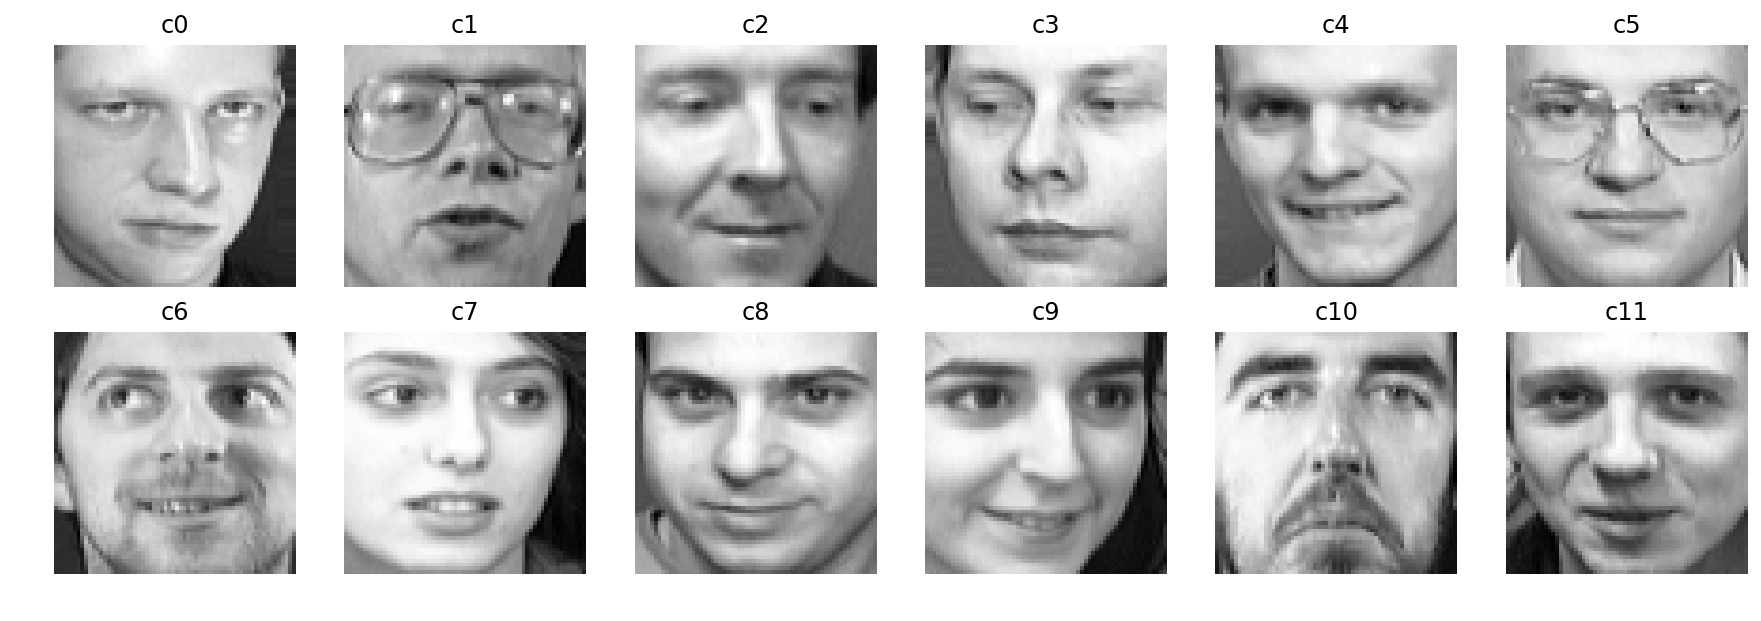

In [14]:
n_row = 2
n_col = 6

sample_images = None
sample_titles = []

for i in range(n_targets):
    people_images = X[y==i]
    people_sample_index = np.random.randint(0, people_images.shape[0], 1)
    people_sample_image = people_images[people_sample_index, :]
    if sample_images is not None:
        sample_images = np.concatenate( (sample_images, people_sample_image), axis=0 )
    else:
        sample_images = people_sample_image
    sample_titles.append(target_names[i])

plot_gallery(sample_images, sample_titles, h, w, n_row, n_col)

In [15]:
# www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [17]:
from sklearn.svm import SVC

start = time.clock()
print("Fitting train datasets , using SVC... ... ")
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
print("Done in ({0:.2f}s".format(time.clock() - start))

Fitting train datasets , using SVC... ... 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Done in (1.22s
